### Import modules

In [93]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


### Import Dataset

In [94]:
 pd.set_option('display.max_columns', None)
workers_df = pd.read_csv("../data/raw/factory_workers.csv", sep=',', encoding="mac_roman")

In [95]:
workers_df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_fname,sup_lname,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,event_week_in_series,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.489,Efficacy,None,1.2,None,None
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.023,Efficacy,None,0.8,None,None
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714285714,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,Susan,Dahl,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None


### Drop Unnecessary Columns

In [96]:
# drop unnecessary columns
unnecessary_cols = ['sub_fname', 'sub_lname','sub_coll_IDs', 'sub_colls_same_sex_prtn','sup_fname', 'sup_lname','event_week_in_series',
 'event_day_in_series','event_weekday_num', 'event_weekday_name', 'recorded_note_from_sup', 'record_conf_matrix_h', 
                   'behav_cause_h', 'record_cause']

workers_df.drop(columns=unnecessary_cols, inplace=True)

In [97]:
# drop all rows with production director as sub_role
workers_df = workers_df[workers_df['sub_role'] != 'Production Director']

In [98]:
# check df
workers_df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,behav_comptype_h,actual_efficacy_h,record_comptype,recorded_efficacy
0,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
1,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.489,Efficacy,1.2
2,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
3,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.023,Efficacy,0.8
4,98000003,20,F,Shift 1,Team 3,Team Leader,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None


### Create target variable column

In [99]:
# create a binary column based on whether a worker resigned or not
workers_df['Resigned'] = [1 if x == 'Resignation' else 0 for x in workers_df['behav_comptype_h']]

### Feature Engineering: Encode Categorical Variables

In [100]:
# Get a list of relevant events
relevant_events = list(workers_df['behav_comptype_h'].unique())
sabotage = relevant_events[-1]
relevant_events = relevant_events[:10]
relevant_events.append(sabotage)
relevant_events

['Presence',
 'Efficacy',
 'Feat',
 'Slip',
 'Sacrifice',
 'Lapse',
 'Idea',
 'Teamwork',
 'Absence',
 'Disruption',
 'Sabotage']

***Count the number of instances each employee had an underrecorded efficacy score***

In [101]:
# Find a count of underrecorded efficacy for each employee
underrecorded_efficacies = workers_df[workers_df['recorded_efficacy'] < workers_df['actual_efficacy_h']]
underrecorded_efficacies

# Group underrecorded efficacies by sub_ID and get count
efficacy = underrecorded_efficacies.groupby('sub_ID')['recorded_efficacy'].count().reset_index()

# Rename col
efficacy.rename(columns={'recorded_efficacy':'Num Underrecorded Efficacy'}, inplace=True)
efficacy.sort_values(by='Num Underrecorded Efficacy', ascending=False).head()

,sub_ID,Num Underrecorded Efficacy
347,98000425,213
447,98000539,213
156,98000195,212
95,98000123,211
495,98000600,211


***Count the number of instances each employee had a mismatched relevant event recorded***

In [102]:
# Filter df based on relevant events
relevant_events_df = workers_df[workers_df['behav_comptype_h'].isin(relevant_events)]

In [103]:
# Find a count of mismatched recorded events for each employee
mismatched_events = relevant_events_df[relevant_events_df['behav_comptype_h'] != relevant_events_df['record_comptype']]

# Group by sub_ID and get a count of each mismatched event
events = mismatched_events.groupby('sub_ID')['behav_comptype_h'].count().reset_index()

# Rename column and sort
events.rename(columns={'behav_comptype_h':'Num Mismatched Events'}, inplace=True)
events.sort_values('Num Mismatched Events', ascending=False).head()

,sub_ID,Num Mismatched Events
415,98000532,15
426,98000547,15
100,98000137,12
264,98000349,12
167,98000219,12


In [104]:
# Merge Mismatched Efficacies and Events 
new_features = efficacy.merge(events, left_on='sub_ID', right_on='sub_ID', how='left')
new_features

,sub_ID,Num Underrecorded Efficacy,Num Mismatched Events
0,98000001,185,7.0
1,98000002,202,4.0
2,98000003,194,6.0
3,98000004,183,5.0
4,98000005,181,5.0
...,...,...,...
680,98000785,9,NaN
681,98000786,5,2.0
682,98000787,7,NaN
683,98000788,1,1.0


In [105]:
# fill missing values for Mismatched events column with 0
new_features.fillna(0, inplace=True)

# Convert data type to int for mismatched events col
new_features['Num Mismatched Events'] = new_features['Num Mismatched Events'].astype('int')
new_features.dtypes

sub_ID                        int64
Num Underrecorded Efficacy    int64
Num Mismatched Events         int64
dtype: object

In [106]:
# Merge new features to original dataframe
merged_df = workers_df.merge(new_features, left_on='sub_ID', right_on='sub_ID')

### Drop duplicate rows and some Categorical Features

In [107]:
# drop features already encoded
features_to_drop = ['behav_comptype_h', 'record_comptype', 'actual_efficacy_h', 'recorded_efficacy']
merged_df.drop(columns=features_to_drop, inplace=True)

In [108]:
# drop duplicate rows based on last event date
df = merged_df.sort_values('event_date').drop_duplicates('sub_ID', keep='last')
df = df.sort_values('sub_ID')

# Convert event_date col to datetime 
df['event_date'] = pd.to_datetime(df['event_date'])

### Create Dummy Variables for Categorical Features

In [109]:
# Features to encode
cat_vars = ['sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_workstyle_h', 'sup_sex', 'sup_role']

In [110]:
# Get dummy variables
df = pd.get_dummies(df, columns=cat_vars, prefix=cat_vars)

In [111]:
# Inspect encoded features
df.head()

,sub_ID,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_ID,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,Resigned,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Production Director,sup_role_Shift Manager,sup_role_Team Leader
377,98000001,40,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,98000216,24,-16,0.842,0.948,0.971,2021-09-09,0,185,7,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
1191,98000002,61,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,98000216,24,-37,0.842,0.948,0.971,2021-09-09,0,202,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1991,98000003,20,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,98000216,24,4,0.842,0.948,0.971,2021-09-09,0,194,6,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2796,98000004,18,0.547,0.819,0.659,0.776,0.556,0.755,0.872,0.382,98000216,24,6,0.842,0.948,0.971,2021-09-09,0,183,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3592,98000005,59,0.777,0.629,0.678,0.749,0.652,0.686,0.566,0.336,98000216,24,-35,0.842,0.948,0.971,2021-09-09,0,181,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [112]:
# drop dummy feature with production director supervisor role
df.drop(columns=['sup_role_Production Director'], inplace=True)

In [113]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 377 to 411132
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   sub_ID                      685 non-null    int64         
 1   sub_age                     685 non-null    int64         
 2   sub_health_h                685 non-null    float64       
 3   sub_commitment_h            685 non-null    float64       
 4   sub_perceptiveness_h        685 non-null    float64       
 5   sub_dexterity_h             685 non-null    float64       
 6   sub_sociality_h             685 non-null    float64       
 7   sub_goodness_h              685 non-null    float64       
 8   sub_strength_h              685 non-null    float64       
 9   sub_openmindedness_h        685 non-null    float64       
 10  sup_ID                      685 non-null    object        
 11  sup_age                     685 non-null    object   

### Fix data types

In [114]:
# get features with object types to convert to int
o_types = df.select_dtypes(include=['object'], exclude=['datetime']).columns.to_list()

# convert to num type
df[o_types] = df[o_types].apply(pd.to_numeric, errors='coerce')

## Check for Class Imbalance

In [115]:
# get class counts
class_counts = df['Resigned'].value_counts()
class_counts

0    669
1     16
Name: Resigned, dtype: int64

In [116]:
# format counts as a percentage of df
class_percentages = pd.Series([(x/df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    97.664234
1     2.335766
dtype: float64

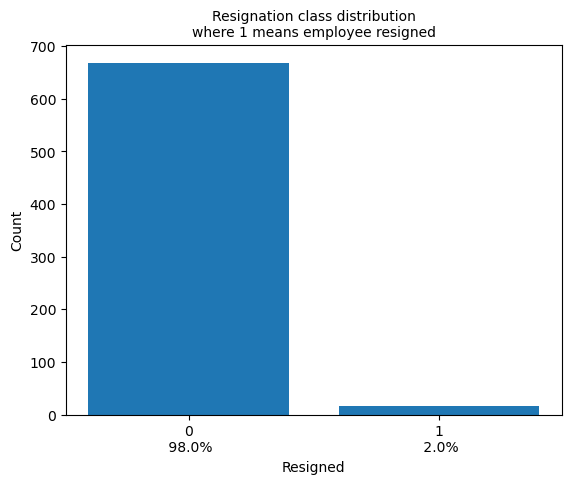

In [117]:
# visualize class balance

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Resigned')
ax.set_title('Resignation class distribution\nwhere 1 means employee resigned',
              fontsize = 10)
plt.show()

Since the dataset is highly imbalanced, this needs to be handled before any modelling can be done. 

### Create train and test splits

In [118]:
# Create target variable and feature matrix
X = df.drop(columns=['sub_ID', 'sup_ID', 'event_date', 'Resigned'])
y = df['Resigned']

In [119]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
# View train set
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
11973,62,0.851,0.581,0.771,0.595,0.894,0.683,0.824,0.483,54,-8,0.966,0.802,0.931,190,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
146521,63,0.831,0.995,0.546,0.671,0.816,0.936,0.344,0.537,38,-25,0.747,0.728,0.985,190,7,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
116743,60,0.769,0.829,0.689,0.642,0.956,0.630,0.875,0.591,29,-31,0.683,0.384,0.436,181,11,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
399007,60,0.767,0.622,0.823,0.649,0.780,0.854,0.744,0.643,46,-14,0.762,0.757,0.780,12,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
382554,31,0.876,0.666,0.649,0.696,0.984,0.805,0.412,0.603,45,14,0.780,0.912,0.583,121,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


## Check if class proportions preserved in splits

In [121]:
# check if class imbalanced preserved in splits
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('Did not resign\n(0 = no resignation)', fontsize = 8)
    ax[0].set_title('% Resigned (where 1 means employee resigned):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

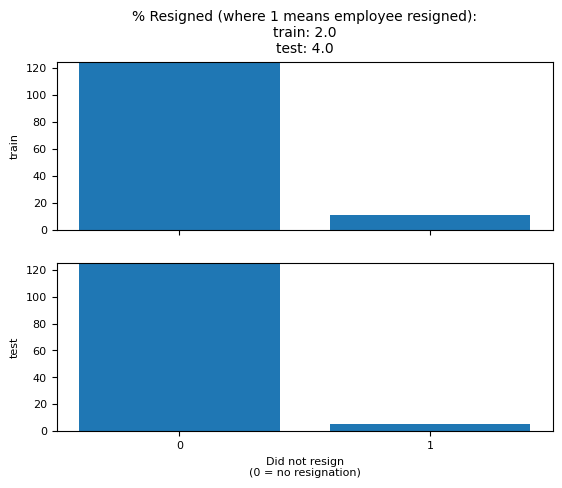

In [122]:
plot_y_ratios(y_train, y_test)

Class proportions seemed to be preserved in the splits. Check to see if using the `stratify` argument of `train_test_split` makes any difference

### Try to better preserve the class proportions from the original dataset


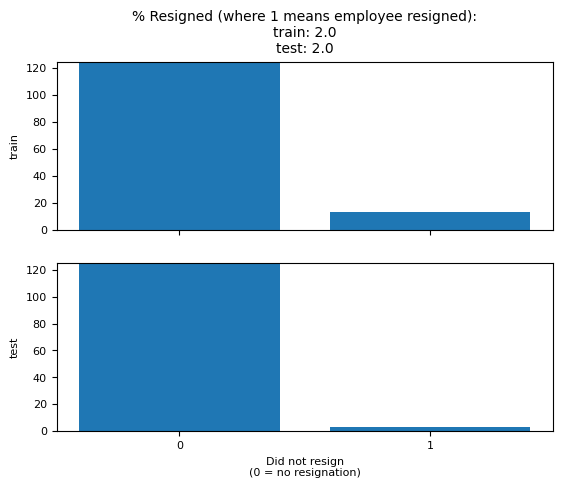

In [123]:
# split data with stratify argument
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify = y)

# check ratios
plot_y_ratios(y_train_strat, y_test_strat)

Class proportions are also preserved with `stratify` attribute. Will use original `train_test_split` results.

### Preprocessing: Standardize Numeric Features

Standardize after splitting into train and test sets to avoid data leakage, over-optimistic results and unrealistic performance evaluations.

In [124]:
# Get numeric features
num_features = ['sub_age', 'sub_health_h', 'sub_commitment_h',
       'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h',
       'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h',
       'Num Underrecorded Efficacy', 'Num Mismatched Events', 'sup_age', 'sup_sub_age_diff',
               'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h']

In [125]:
# instantiate scaler
SS_scaler = StandardScaler()

# fit values to scaler
SS_scaler.fit(X_train[num_features])

# Get standardized values as a new df
X_train[num_features] = SS_scaler.transform(X_train[num_features])

# Transform test features
X_test[num_features] = SS_scaler.transform(X_test[num_features])


In [126]:
# View train set with updated scaled values
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
11973,1.527432,0.707460,-1.127066,0.153136,-0.920603,0.926109,-0.358535,0.515376,-1.696963,0.964016,-0.357598,1.546008,0.389179,1.387348,0.872806,1.138468,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
146521,1.600625,0.575450,1.604127,-1.291524,-0.426578,0.449880,1.304687,-2.530059,-1.354781,-0.145963,-1.229461,-0.021949,-0.026958,1.729004,0.872806,0.811144,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
116743,1.381046,0.166217,0.509011,-0.373362,-0.615088,1.304650,-0.706957,0.838953,-1.012600,-0.770327,-1.537177,-0.480165,-1.961433,-1.744498,0.733680,2.120442,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
399007,1.381046,0.153016,-0.856586,0.487013,-0.569586,0.230082,0.765619,0.007803,-0.683091,0.409026,-0.665315,0.085445,0.136123,0.431977,-1.878785,-1.152804,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
382554,-0.741544,0.872473,-0.566314,-0.630190,-0.264070,1.475604,0.443493,-2.098622,-0.936559,0.339653,0.770694,0.214318,1.007762,-0.814435,-0.193822,-0.825479,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [127]:
# view scaled test set
X_test.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
341180,1.527432,-2.460790,-0.434372,1.141926,0.418465,1.438971,-0.726679,0.109318,0.780686,0.894643,-0.408885,1.395656,-1.230381,1.608792,0.950098,0.483819,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
400222,1.673818,-1.338701,-1.588862,0.474172,-1.167616,0.089655,-0.634643,1.517832,0.185036,-1.047822,-1.947466,0.844365,1.131478,-1.206706,-1.492325,-1.152804,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
152544,-1.473472,-1.259495,-2.103435,1.308864,1.114000,1.493921,-2.028331,-0.499769,1.433366,-0.145963,0.924553,-0.021949,-0.026958,1.729004,1.011931,1.465793,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
354903,-0.668352,0.159617,0.581579,-2.980170,1.205005,1.414549,1.705701,0.654958,0.083649,-1.533438,-0.665315,0.493543,-0.414978,0.273803,-1.152241,-0.498155,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
293430,-0.668352,-1.107683,-0.962139,1.052036,0.606974,-0.343836,-2.435919,-0.277706,-0.550021,0.339653,0.719408,0.214318,1.007762,-0.814435,0.671847,1.793117,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


### Visualize new scaled features

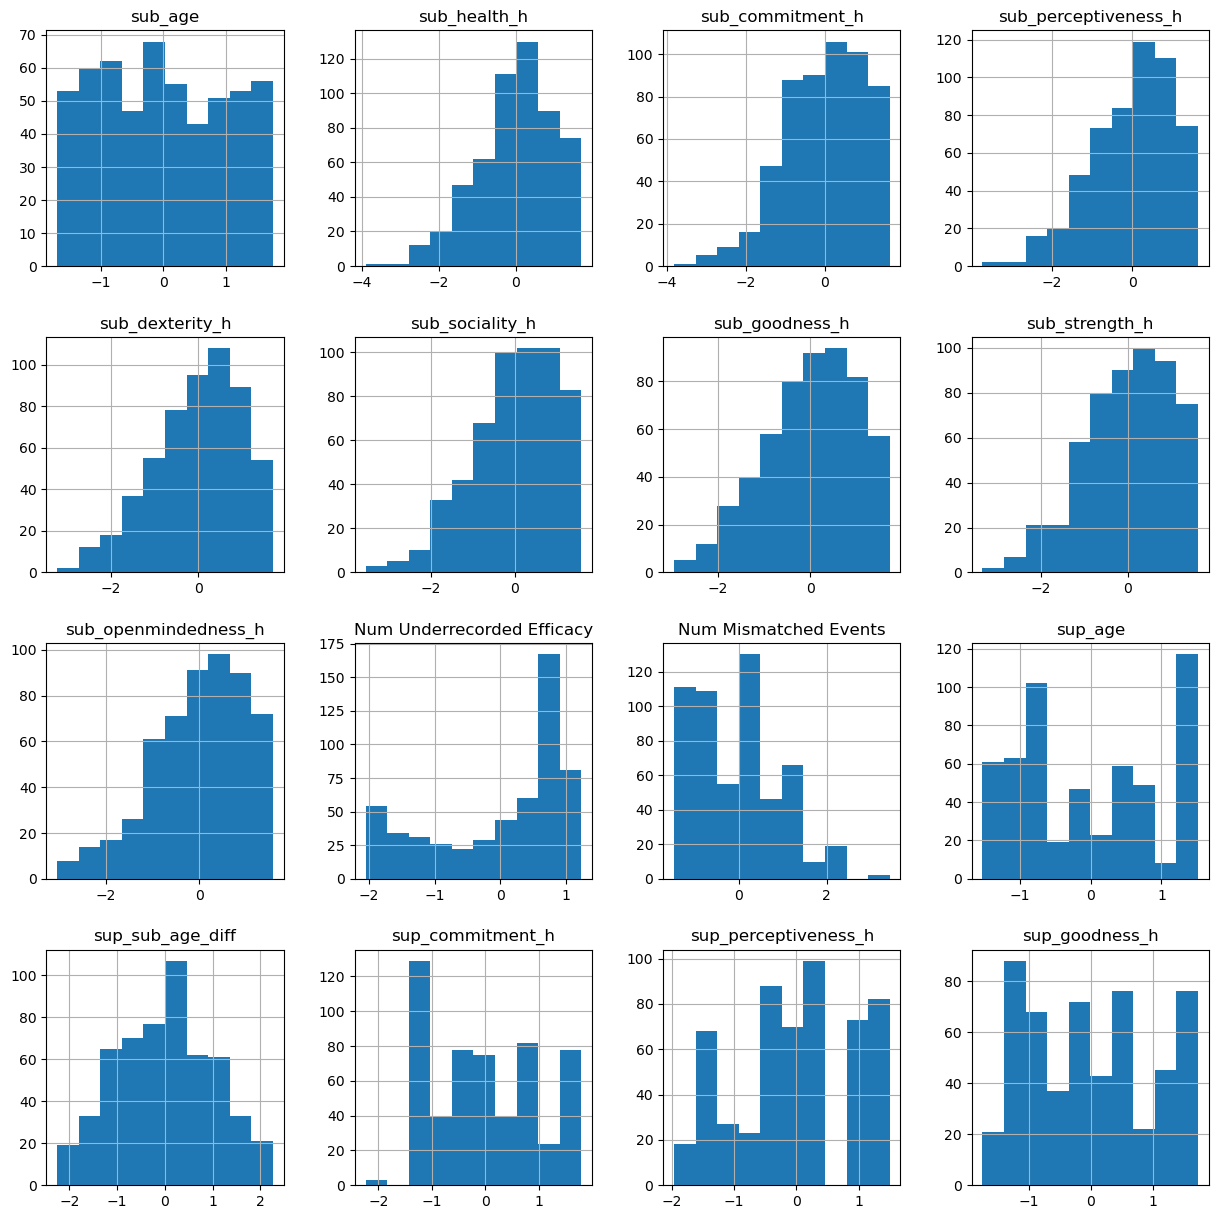

In [128]:
# View new standardized train features
scaled_data = pd.DataFrame(X_train[num_features], columns=num_features)

# Visualize shape of features 
scaled_data.hist(figsize=(15,15))
plt.show()

### Check for Outliers with Boxplots

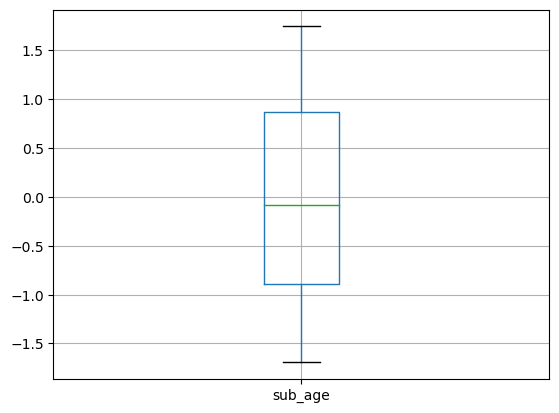

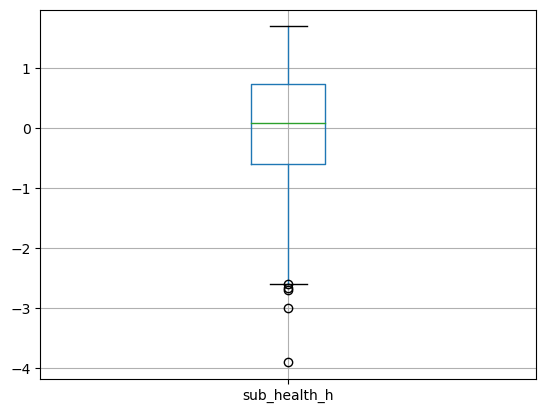

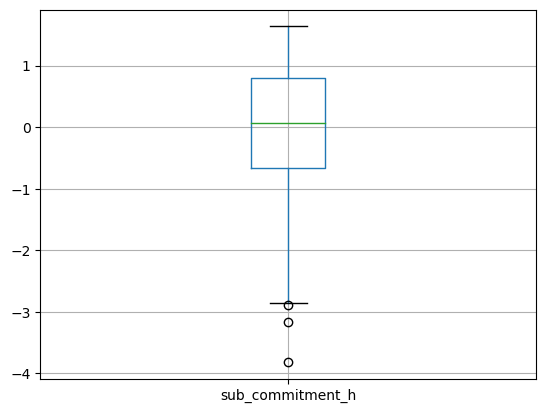

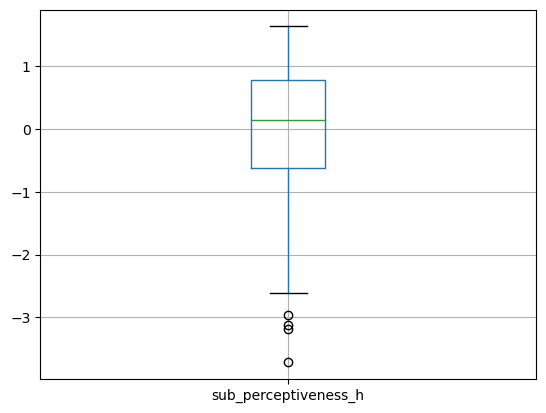

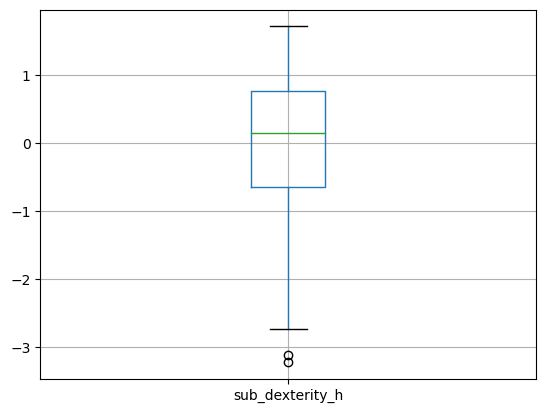

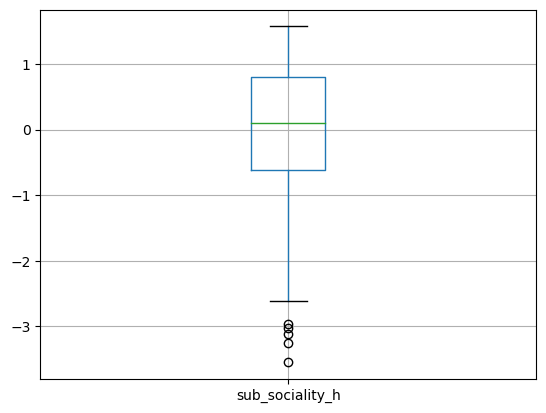

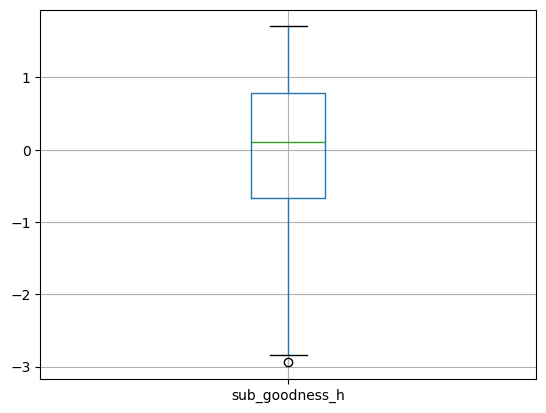

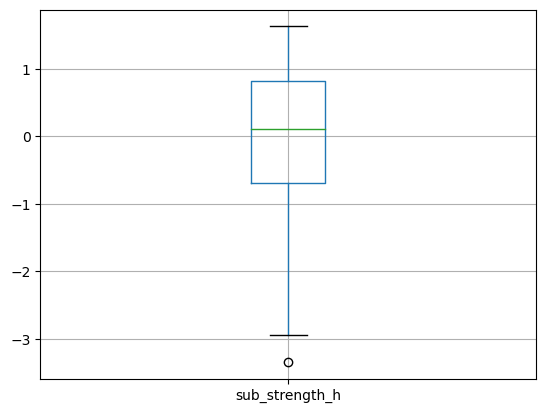

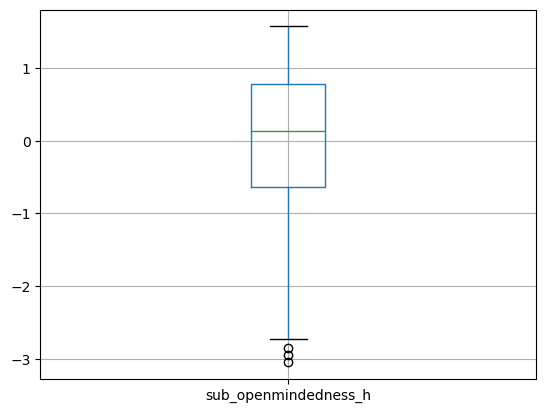

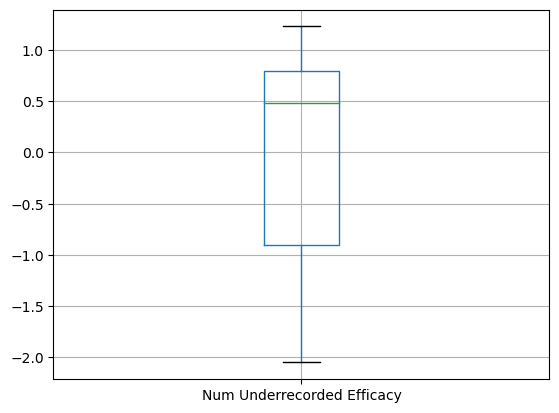

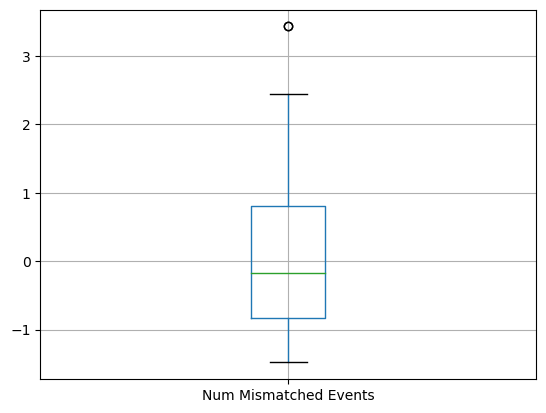

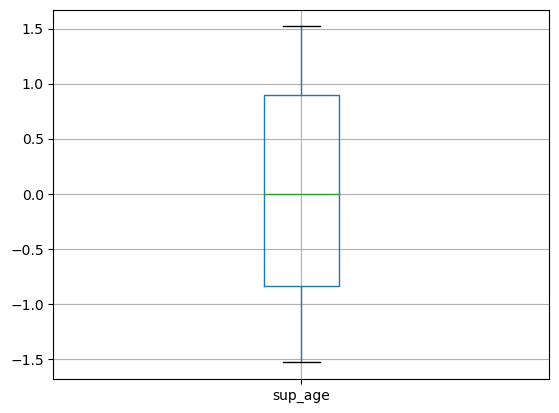

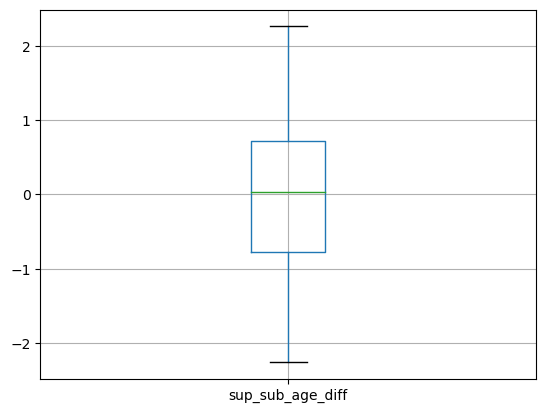

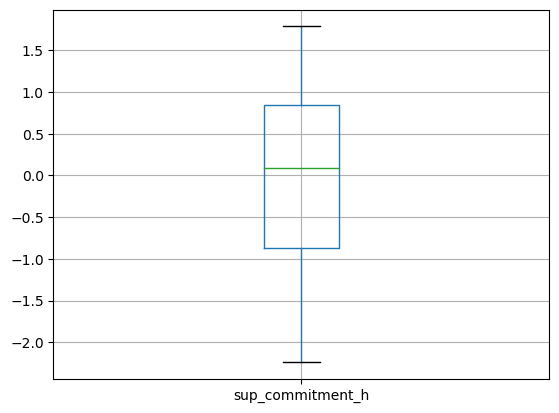

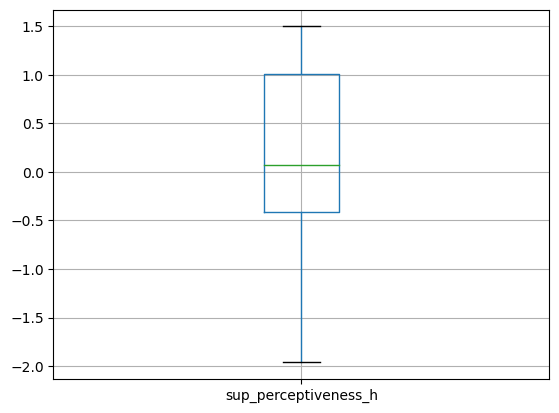

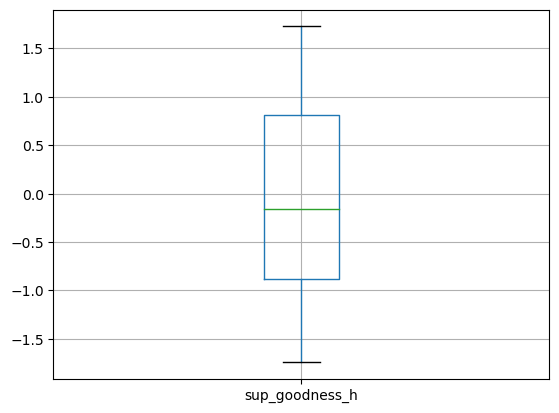

In [129]:
for feature in X_train[num_features].columns:
    X_train[[feature]].boxplot()
    plt.show()

## Export train and test data

In [130]:
try:
    X_train.to_csv('../data/processed/X_train.csv', index=False)
    X_test.to_csv('../data/processed/X_test.csv', index=False)
    y_train.to_csv('../data/processed/y_train.csv', index=False)
    y_test.to_csv('../data/processed/y_test.csv', index=False)
except:
    print('Could not export.')